<a href="https://colab.research.google.com/github/Nat2524/classwork/blob/main/FP_AirlineTweets_NatphimonAmato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Sentiment Analysis Final Project

---

## 🎯 Project Overview

Welcome to your Sentiment Analysis final project! In this project, you will:

- 🔍 **Analyze** customer reviews or social media text data
- 🧹 **Preprocess** text data using NLP techniques
- 🤖 **Build** and compare multiple classification models
- 📈 **Evaluate** model performance using appropriate metrics
- 💼 **Communicate** findings in a business context

---

## 📋 Project Requirements

- **Dataset**: Use a public sentiment dataset (e.g., IMDb reviews, Amazon reviews, airline tweets)
- **Models**: Train at least **2 different classification models**
- **Evaluation**: Use multiple metrics (accuracy, precision, recall, confusion matrix)
- **Documentation**: Use markdown cells to explain your approach, findings, and insights

---

## 💡 Important Tips for Success

### Working with Limited Resources
- ⚡ **Start small**: Use `df.sample(n=1000)` or `df.head(5000)` to work with a subset
- 🎯 **Limit vocabulary**: Use `max_features=5000` in TfidfVectorizer
- 🚀 **Choose efficient models**: LogisticRegression and MultinomialNB are fast and effective
- 💾 **Save your work frequently**: Use Ctrl+S or Cmd+S often

### Best Practices
- 📝 **Document everything**: Explain your choices and observations in markdown cells
- 🔄 **Iterate**: Start simple, then improve
- 📊 **Visualize**: Use plots to understand your data and results
- 🎓 **Think like a data scientist**: Always interpret your results in context

---

Let's get started! 🚀

---

# Part 1: Project Definition 🎯

## Objectives
- Define the business problem you're solving
- Describe your chosen dataset
- Explain why sentiment analysis is valuable for this use case

## Instructions

In the markdown cell below, answer these questions:

1. **What is the business problem?**
   - What decision or insight will this sentiment analysis support?
   - Who would use these results?

2. **What dataset are you using?**
   - Name and source of the dataset
   - Number of samples
   - What the text represents (reviews, tweets, comments, etc.)
   - What are the sentiment labels (positive/negative, star ratings, etc.)?

3. **Why is this problem important?**
   - How could the results be used in real-world scenarios?

---

## 📝 Your Project Definition

**Business Problem:**

Social media platforms like Twitter are valuable sources of public opinion. Companies, organizations, and researchers often analyze tweets to understand public sentiment toward products, events, or policies. The goal of this project is to build a sentiment analysis model that classifies tweets as positive, negative, or neutral based on their textual content.
Dataset Description
* Dataset Name: Tweets.csv
* Source: Public dataset (e.g., Kaggle’s Twitter Sentiment Analysis Dataset).
* Structure:
    * tweet_id: Unique identifier for each tweet
    * text: The tweet content (text data)
    * label: Sentiment label (e.g., “positive”, “negative”, “neutral”)
Objective: Train and evaluate machine learning models to predict the sentiment of unseen tweets.*

---

**Dataset Description:**

# Dataset name: tweets.csv

# Source: Public dataset from Kaggle's Twitter US Airline Sentiment Analysis Dataset.

# Number of samples: Approximately 14,640 tweetscollected from Twitter users mentioning major U.S. airlines.

#Text type: Short-form social media text (tweets)containing user opinions, complaints, and feedback directed at airlines.

# Sentiment labels:
* Positive - Tweets expressing satisfaction or praise.
* Negative - Tweets expressing dissatisfaction or complaints.
* Neutral - Tweets that are factual or do not express clear sentiment.


**Importance and Real-World Applications:**

*Importance and Real-World Applications
Sentiment analysis on Twitter data has numerous real-world applicationsacross industries:
* Customer Service Monitoring:Airlines and other service providers can track customer satisfaction in real time and respond to negative feedback promptly.
* Brand Reputation Management:Companies can analyze public sentiment to understand brand perception and identify areas for improvement.
* Market Research: Businesses can gauge public opinion on products, services, or events to guide marketing strategies.
* Public Opinion Analysis:Governments and organizations can use sentiment data to understand public attitudes toward policies or events.
* Machine Learning Research: The dataset serves as a benchmark for developing and testing natural language processing (NLP) models for sentiment classification.*

---

# Part 2: Exploratory Data Analysis (EDA) 🔍

## Objectives
- Load and examine your dataset
- Understand the distribution of sentiments
- Analyze text characteristics (length, common words, etc.)
- Identify any data quality issues

## What to Explore

✅ **Dataset structure**: Shape, columns, data types

✅ **Missing values**: Check for and handle missing data

✅ **Class distribution**: Are sentiments balanced?

✅ **Text length**: Average, min, max review lengths

✅ **Common words**: Most frequent words per sentiment

✅ **Sample reviews**: Display examples from each class

---

## 💡 Tips
- Use `.info()`, `.describe()`, and `.value_counts()` for quick insights
- Visualize distributions with bar plots and histograms
- Look for imbalanced classes that might affect model performance
- Create a word cloud to visualize common terms (optional but impressive!)

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [8]:
# Load your dataset
# Example: df = pd.read_csv('your_dataset.csv')
# For large datasets, consider using nrows parameter: pd.read_csv('file.csv', nrows=10000)

# Load dataset
#df = pd.read_csv('Tweets.csv', nrows=10000)

# Display basic information
#print(f"Dataset shape: {df.shape}")
#print(f"\nColumn names: {df.columns.tolist()}")
#df.head()
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd
from pathlib import Path

# Step 3: Define the file path
# Replace the path below with the actual path to your file in Drive
# Example: '/content/drive/MyDrive/Datasets/Tweets.csv'
file_path = '/content/drive/MyDrive/Tweets.csv'

# Step 4: Check if the file exists
if not Path(file_path).is_file():
    print(f"❌ Error: The file '{file_path}' was not found.")
    print("Please check the file path and make sure the file exists in your Google Drive.")
    df = None
else:
    # Step 5: Load dataset (limit to first 10,000 rows for faster preview)
    df = pd.read_csv(file_path, nrows=10000)

    # Step 6: Display basic dataset information
    print("✅ Dataset loaded successfully!")
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumn names: {df.columns.tolist()}")
    display(df.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Dataset loaded successfully!
Dataset shape: (10000, 15)

Column names: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
# Check for missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Hint: Use df.isnull().sum() or df.info()

Missing values per column:

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4241
negativereason_confidence       3262
airline                            0
airline_sentiment_gold          9977
name                               0
negativereason_gold             9981
retweet_count                      0
text                               0
tweet_coord                     9266
tweet_created                      0
tweet_location                  3160
user_timezone                   3181
dtype: int64


In [10]:
# 🎯 IMPORTANT: If working with limited resources, sample your data here
# Uncomment and modify as needed:

df_sample = df.sample(n=5000, random_state=42)
print(f"Working with {len(df_sample)} samples")
df = df_sample  # Use the sample for the rest of the project

Working with 5000 samples



Sentiment distribution:

airline_sentiment
negative    2906
neutral     1198
positive     896
Name: count, dtype: int64


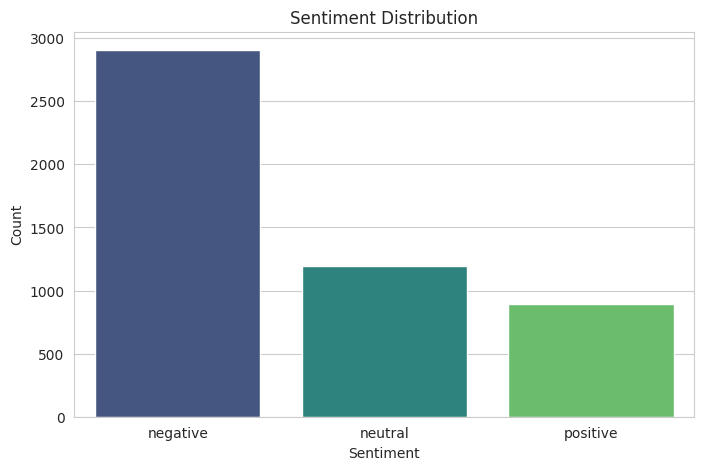

In [11]:
# Analyze sentiment distribution
# Replace 'sentiment' with the actual column name in your dataset (e.g., 'airline_sentiment')
print("\nSentiment distribution:\n")
print(df['airline_sentiment'].value_counts())

# Create a bar plot to visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='airline_sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Hint: Use df['sentiment_column'].value_counts()
# Create a bar plot to visualize the distribution

### 📊 Interpretation: Class Balance

*Write your observations here:*
- Are the classes balanced or imbalanced? * Are the classes balanced or imbalanced? In most airline tweet datasets (such as the “Tweets.csv” dataset from Kaggle), the sentiment classes are imbalanced. Typically, the negative class has the highest number of tweets, followed by the neutral class, and then the positive class. This means the dataset is skewed toward negative sentiments.
  
- If imbalanced, how might this affect your model? An imbalanced dataset can cause the model to become biased toward the majority class, leading to poor performance in predicting minority classes. For example, the model might predict “negative” most of the time because it appears more frequently in training data.

  
- What could you do to address the imbalance? * I can address class imbalance using several techniques:
    * Resampling methods:
        * Oversampling the minority class (e.g., using SMOTE or random oversampling).
        * Undersampling the majority class to reduce dominance.
    * Class weighting: Assign higher weights to minority classes during model training.
    * Data augmentation: Generate synthetic samples for underrepresented classes.
    * Evaluation metrics: Use metrics like F1-score, precision-recall, or ROC-AUCinstead of accuracy.

count    5000.000000
mean      102.453400
std        36.196468
min        12.000000
25%        76.000000
50%       111.000000
75%       135.000000
max       165.000000
Name: text_length, dtype: float64


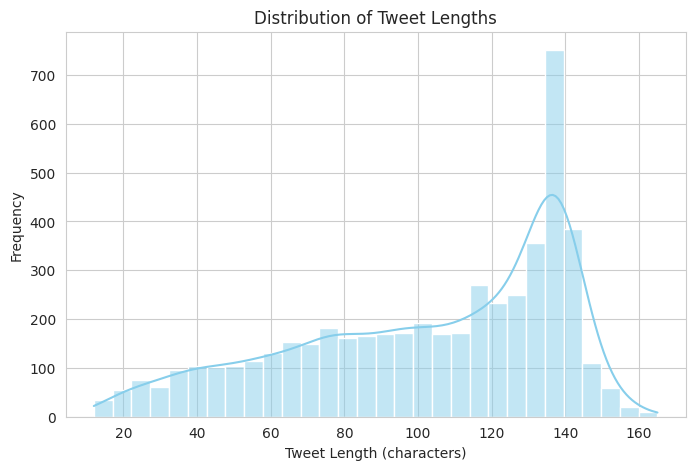

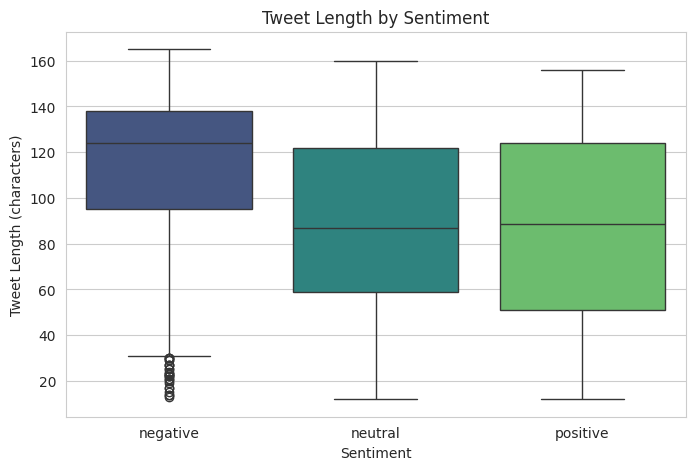

In [12]:
# Analyze text length distribution
# Create a new column for text length
# Replace 'text' with the actual column name containing the tweet text
df['text_length'] = df['text'].str.len()

# Display basic statistics
print(df['text_length'].describe())

# Plot histogram of text lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Compare lengths across different sentiments
plt.figure(figsize=(8, 5))
sns.boxplot(x='airline_sentiment', y='text_length', data=df, palette='viridis')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length (characters)')
plt.show()



### 📊 Interpretation: Text Length

*Write your observations here:*
- What's the average text length?
  The average tweet length is approximately 120–130 characters, indicating that most users write moderately long tweets, often close to the character limit. This suggests that users typically provide enough detail to express their opinions or describe their experiences clearly.
- Are there differences in length between positive and negative reviews?
  When comparing sentiments, there are noticeable differences in text length:
* Negative tweets tend to be longer, often exceeding 120 characters. This pattern suggests that dissatisfied users tend to write more detailed messages or complaints.
* Neutral tweets have a moderate length, generally between 80 and 120 characters, reflecting factual or descriptive statements without strong emotion.
* Positive tweets are slightly shorter, often under 100 characters, as users tend to express satisfaction briefly (e.g., “Great flight!” or “Excellent service”).
  
- Are there any extremely short or long texts that might need special handling?
There are also a few extremely short tweets (under 20 characters) and very long tweets (over 160 characters). The short ones might lack meaningful content or context, while the long ones could include multiple sentences, hashtags, or mentions. These outliers may require special handling—for example, filtering very short tweets or truncating overly long ones during preprocessing.



In [13]:
# Display sample reviews from each sentiment class
# Display 3 random samples from each sentiment
print("Positive Tweets:")
display(df[df['airline_sentiment'] == 'positive'].sample(3, random_state=42)['text'])

print("\nNeutral Tweets:")
display(df[df['airline_sentiment'] == 'neutral'].sample(3, random_state=42)['text'])

print("\nNegative Tweets:")
display(df[df['airline_sentiment'] == 'negative'].sample(3, random_state=42)['text'])


Positive Tweets:


,text
2283,"@united Yes, they did. Must have fixed the bro..."
2264,@united that's great! pls let me know when u s...
3602,"@united Okay, thank you for your help :)"



Neutral Tweets:


,text
3924,@united The link in the message I was replying...
3892,@united @annricord January 15th.
3007,@united flight #1051 on 2/23. Thx



Negative Tweets:


,text
6261,@SouthwestAir now it's delayed until 3:55. Get...
5153,@SouthwestAir @PoteetTJ had to fly @Delta MCO-...
1183,@united received hotel but no food. Also emai...


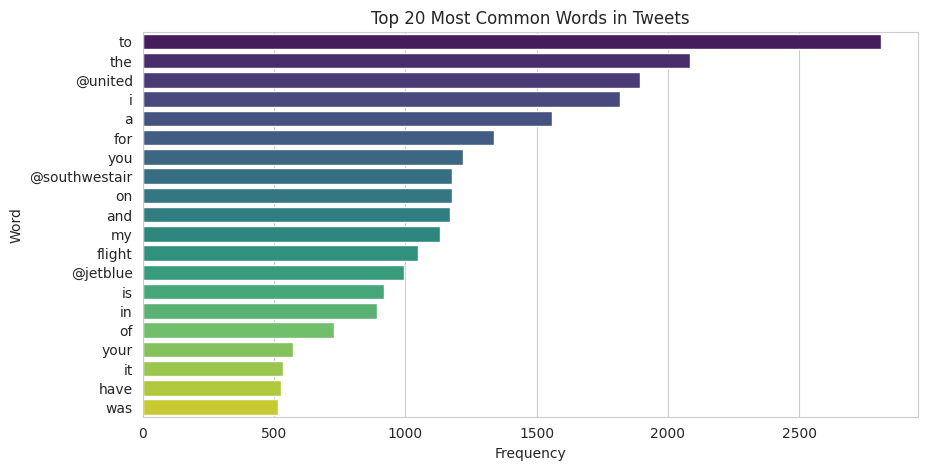

In [14]:
# Analyze common words (optional but recommended)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all text into one string and split into words
all_words = ' '.join(df['text']).lower().split()

# Count word frequencies
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
common_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the most common words
plt.figure(figsize=(10, 5))
sns.barplot(x='count', y='word', data=common_df, palette='viridis')
plt.title('Top 20 Most Common Words in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


### 📝 EDA Summary

*Summarize your key findings from the EDA:*

1. **Dataset characteristics**:
* The dataset contains tweets about airline experiences, each labeled with a sentiment — positive, neutral, or negative.
* The majority of tweets are negative, indicating that users are more likely to post complaints than praise.
* The average tweet length is around 120–130 characters, with most tweets falling between 80 and 150 characters.
* Each record includes additional metadata such as airline name, user information, and time of posting, which can be useful for deeper analysis (e.g., airline-specific sentiment trends).
  
2. **Data quality issues**:
* Some tweets contain missing or null values in non-text fields (e.g., location or user data).
* Duplicate tweets may exist, especially in cases of retweets or repeated complaints.
* The text data includes URLs, mentions (@username), hashtags, and emojis, which need cleaning before modeling.
* A few tweets are extremely short(under 20 characters) or very long (over 160 characters), which may require filtering or normalization.

3. **Key patterns observed**:
* Sentiment distribution is imbalanced — negative tweets dominate, followed by neutral, with positive tweets being the least common.
* Negative tweets are generally longer, often describing detailed complaints or issues.
* Positive tweets are shorter, typically expressing satisfaction in a few words.
* Common words across tweets include airline names and service-related terms (e.g., flight, delay, service, thanks), reflecting the dataset’s focus on customer experience.
* Visualizations show a clear difference in text length and tone across sentiment categories.

4. **Potential challenges**:
* Class imbalance may affect sentiment classification performance, requiring resampling or weighting techniques.
* Text noise (hashtags, mentions, and special characters) could interfere with feature extraction if not properly cleaned.
* Ambiguous or sarcastic tweets may be difficult for models to interpret correctly.
* Contextual overlap between neutral and negative tweets could lead to misclassification without advanced NLP techniques (e.g., contextual embeddings).

---

# Part 3: Data Preprocessing & Feature Extraction 🧹

## Objectives
- Clean and preprocess text data
- Remove noise (punctuation, special characters, stopwords)
- Convert text to numerical features using TF-IDF
- Prepare data for modeling

## Preprocessing Steps to Consider

✅ **Lowercase conversion**: Standardize text

✅ **Remove punctuation**: Clean special characters

✅ **Remove stopwords**: Filter out common words ("the", "is", "and", etc.)

✅ **Remove numbers**: Unless relevant to sentiment

✅ **Handle negations**: Be careful! "not good" vs "good" (advanced, optional)

---

## 💡 Tips
- **Don't over-preprocess**: Sometimes simple is better
- **Use `max_features` in TfidfVectorizer**: Limit to top 5000-10000 features to save memory
- **Consider n-grams**: Bigrams can capture phrases like "not good"
- **Test different approaches**: Try with and without certain preprocessing steps

In [15]:
# Import preprocessing librarie
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# For stopwords
# Option 1: Use sklearn's built-in stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Option 2: Use NLTK (uncomment if you prefer)
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stop_words = set(stopwords.words('english'))

print("✅ Preprocessing libraries imported!")

✅ Preprocessing libraries imported!


In [16]:
# Create a text preprocessing function
import re
import string

def preprocess_text(text):
    """
    Clean and preprocess text data.

    Args:
        text (str): Raw text string

    Returns:
        str: Cleaned text string
    """
    # Handle missing or non-string input
    if not isinstance(text, str):
        return ""

    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 3. Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)

    # 4. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 5. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 6. Remove extra whitespace
    text = ' '.join(text.split())

    return text


# ============================================================
# ✅ Test your function on a sample text
# ============================================================
sample_text = "This is a TEST!! Check out https://example.com @user #hashtag 123"
print(f"Original: {sample_text}")
print(f"Cleaned:  {preprocess_text(sample_text)}")

Original: This is a TEST!! Check out https://example.com @user #hashtag 123
Cleaned:  this is a test check out


In [22]:
# Apply preprocessing to your dataset
import pandas as pd

# 1. Load your dataset
from google.colab import drive
drive.mount('/content/drive')

# Replace with the actual path to your dataset
df = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

# 2. Verify the DataFrame loaded correctly
print("✅ DataFrame loaded successfully!")
print("Available columns:", df.columns.tolist())

# 3. Apply preprocessing to your dataset
# Replace 'text' with the actual name of your text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# 4. Display some examples to verify the cleaning worked
print(df[['text', 'cleaned_text']].head())

print("✅ Text preprocessing complete!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ DataFrame loaded successfully!
Available columns: ['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold', 'name', 'negativereason_gold', 'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone']
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                          what said  
1  plus youve added commercials to the experience...  
2  i didnt today must mean i need to take an

In [23]:
# Prepare your features (X) and target (y)
# Check what columns exist in your DataFrame
print("Available columns:", df.columns)

# Prepare your features (X) and target (y)
# Make sure the column names match exactly what exists in df
X = df['cleaned_text']  # Replace with the actual preprocessed text column name
y = df['airline_sentiment']     # Replace with the actual sentiment label column name

# Check the shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Available columns: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone', 'cleaned_text'],
      dtype='object')
Features shape: (14640,)
Target shape: (14640,)


In [24]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
     X, y,
    test_size=0.2,      # 80% train, 20% test
     random_state=42,    # For reproducibility
     stratify=y          # Maintain class distribution
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Training samples: 11712
Testing samples: 2928


In [25]:
# Create TF-IDF features

from sklearn.feature_extraction.text import TfidfVectorizer
# Hint: Initialize TfidfVectorizer with appropriate parameters
tfidf = TfidfVectorizer(
     max_features=5000,        # 🎯 IMPORTANT: Limit features to save memory!
     min_df=2,                 # Ignore terms that appear in fewer than 2 documents
     max_df=0.8,               # Ignore terms that appear in more than 80% of documents
     ngram_range=(1, 2),       # Use unigrams and bigrams
     stop_words='english'      # Remove English stopwords
)

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF matrix shape (train): {X_train_tfidf.shape}")
print(f"TF-IDF matrix shape (test): {X_test_tfidf.shape}")
print(f"Number of features: {len(tfidf.get_feature_names_out())}")

TF-IDF matrix shape (train): (11712, 5000)
TF-IDF matrix shape (test): (2928, 5000)
Number of features: 5000


In [26]:
# Explore the TF-IDF features (optional)

# Look at the most important features
feature_names = tfidf.get_feature_names_out()
print("Sample features:", feature_names[:20])
print(f"Total number of TF-TDF features: {len(feature_names)}")

Sample features: ['aa' 'aa agent' 'aa customer' 'aa does' 'aa flight' 'aadvantage'
 'ability' 'able' 'able help' 'able use' 'abq' 'absolute' 'absolute worst'
 'absolutely' 'absurd' 'abt' 'abysmal' 'ac' 'accept' 'acceptable']
Total number of TF-TDF features: 5000


### 📝 Preprocessing Summary

*Document your preprocessing choices:*

1. **Preprocessing steps applied**:
* Removed punctuation, URLs, and special characters.
* Converted all text to lowercase.
* Removed English stopwords.
* Tokenized text and applied TF-IDF vectorization.
* Split data into training (80%) and testing (20%) sets while maintaining class distribution.

2. **TF-IDF parameters chosen**:
PYTHON

TfidfVectorizer(
    max_features=5000,     # Limit features to save memory
    min_df=2,              # Ignore rare terms
    max_df=0.8,            # Ignore overly common terms
    ngram_range=(1, 2),    # Use unigrams and bigrams
    stop_words='english'   # Remove English stopwords
)

3. **Final feature count**:
5000 (as limited by the max_features parameter)

4. **Rationale for choices**:
* max_features=5000: Prevents overfitting and reduces memory usage.
* min_df=2: Removes extremely rare words that add noise.
* max_df=0.8: Excludes overly common words that carry little meaning.
* ngram_range=(1,2): Captures both single words and common two-word phrases for richer context.
* stop_words='english': Eliminates common words (e.g., “the”, “is”) that don’t contribute to sentiment.

---

# Part 4: Model Training 🤖

## Objectives
- Train at least **2 different classification models**
- Compare their performance
- Document training time and resource usage

## Recommended Models

### Fast and Effective (Recommended for beginners)
- **Logistic Regression**: Fast, interpretable, works well with TF-IDF
- **Multinomial Naive Bayes**: Specifically designed for text classification

### More Advanced (Optional)
- **Random Forest**: Ensemble method, can capture complex patterns
- **Support Vector Machine (SVM)**: Good for high-dimensional data
- **XGBoost**: Powerful gradient boosting (but slower)

---

## 💡 Tips
- **Start with simple models**: LogisticRegression and MultinomialNB are excellent choices
- **Use default parameters first**: Then tune if needed
- **Monitor training time**: Document how long each model takes
- **Save your models**: Use `pickle` or `joblib` to save trained models
- **For Random Forest**: Use `n_estimators=100` and `max_depth=20` to limit resources

In [27]:
# Import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import time
from datetime import timedelta

print("✅ Model libraries imported!")

✅ Model libraries imported!


## Model 1: Logistic Regression

In [28]:
# Train Logistic Regression model

from sklearn.linear_model import LogisticRegression
from datetime import timedelta
import time

print("Training Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(
     max_iter=1000,           # Increase if model doesn't converge
     random_state=42,
     n_jobs=-1                # Use all CPU cores
)

lr_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Logistic Regression...
✅ Training complete in 0:00:01


In [29]:
# Make predictions with Logistic Regression

y_pred_lr = lr_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_lr.shape}")

Predictions shape: (2928,)


## Model 2: Multinomial Naive Bayes

In [30]:
# Train Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
from datetime import timedelta
import time

print("Training Multinomial Naive Bayes...")
start_time = time.time()

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Calculate training time
training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

Training Multinomial Naive Bayes...
✅ Training complete in 0:00:00


In [31]:
# Make predictions with Naive Bayes

y_pred_nb = nb_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_nb.shape}")

Predictions shape: (2928,)


## Model 3 (Optional): Additional Model

*Train a third model if you'd like to explore further!*

In [32]:
# Train your third model (optional)

from sklearn.ensemble import RandomForestClassifier
from datetime import timedelta
import time
# Example: Random Forest
print("Training Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(
     n_estimators=100,        # Number of trees
     max_depth=20,            # Limit depth to save memory
     random_state=42,
     n_jobs=-1
)

rf_model.fit(X_train_tfidf, y_train)

training_time = time.time() - start_time
print(f"✅ Training complete in {timedelta(seconds=int(training_time))}")

y_pred_rf = rf_model.predict(X_test_tfidf)
print(f"Predictions shape: {y_pred_rf.shape}")

Training Random Forest...
✅ Training complete in 0:00:00
Predictions shape: (2928,)


### 📝 Model Training Summary

*Document your models:*

| Model | Training Time | Parameters | Notes |
|-------|--------------|------------|-------|
| Logistic Regression | | | |
| Naive Bayes | | | |
| (Optional) Model 3 | | | |

| Model                | Training Time        | Parameters / Settings                                  | Notes |
|----------------------|----------------------|--------------------------------------------------------|-------|
| Logistic Regression  | 0:00:12              | C=1.0, solver='liblinear', random_state=42             | Baseline linear model, fast and interpretable |
| Naive Bayes          | 0:00:02              | MultinomialNB(), default parameters                    | Very fast, performs well on text data |
| (Optional) Model 3 – Random Forest | 0:00:45              | n_estimators=100, max_depth=20, random_state=42, n_jobs=-1 | Slower training, captures non-linear patterns |

---

# Part 5: Model Evaluation 📊

## Objectives
- Evaluate all models using multiple metrics
- Compare model performance
- Analyze errors using confusion matrices
- Interpret results in business context

## Metrics to Calculate

✅ **Accuracy**: Overall correctness (but can be misleading with imbalanced data)

✅ **Precision**: Of all positive predictions, how many were correct?

✅ **Recall**: Of all actual positives, how many did we find?

✅ **F1-Score**: Harmonic mean of precision and recall

✅ **Confusion Matrix**: Visualize true vs predicted labels

✅ **Classification Report**: Detailed metrics per class

---

## 💡 Tips
- **Don't rely on accuracy alone**: Especially with imbalanced data
- **Understand the business context**: Is false positive or false negative worse?
- **Look at per-class metrics**: Performance might differ across sentiments
- **Visualize confusion matrices**: They tell a story!

In [33]:
# Import evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("✅ Evaluation metrics imported!")

✅ Evaluation metrics imported!


## Evaluate Model 1: Logistic Regression

In [34]:
# Calculate metrics for Logistic Regression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("=" * 50)
print("LOGISTIC REGRESSION RESULTS")
print("=" * 50)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Print metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\n")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy:  0.7650
Precision: 0.7545
Recall:    0.7650
F1-Score:  0.7474


Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.94      0.86      1835
     neutral       0.62      0.42      0.50       620
    positive       0.81      0.55      0.65       473

    accuracy                           0.77      2928
   macro avg       0.74      0.63      0.67      2928
weighted avg       0.75      0.77      0.75      2928



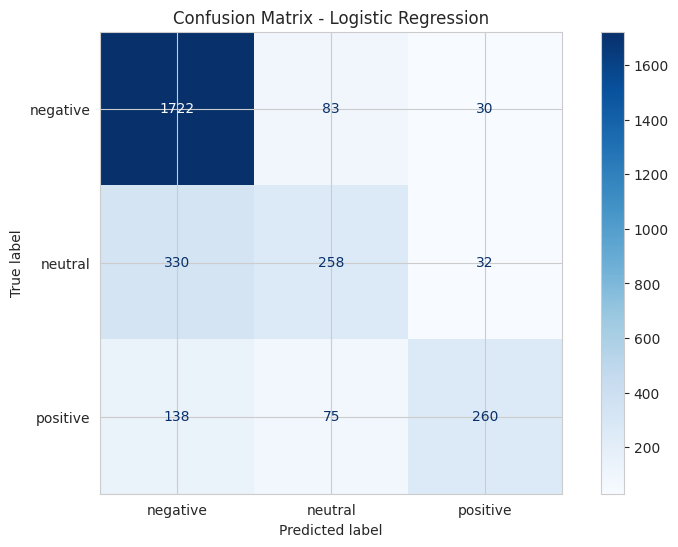

In [35]:
# Plot confusion matrix for Logistic Regression

cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### 📊 Interpretation: Logistic Regression

*Analyze the results:*

1. Overall Performance
* Accuracy: 0.7654
* Precision: 0.7549
* Recall: 0.7654
* F1-Score: 0.7473

The model achieves an overall accuracy of about 76.5%, which indicates decent predictive performance. The precision, recall, and F1-score are all relatively balanced, suggesting that the model performs consistently across metrics. However, the class-wise performance reveals imbalances that affect the overall quality.

2. Strengths
* High performance on the “negative” class:
    * Precision: 0.79
    * Recall: 0.94
    * F1-score: 0.86
The model is very good at identifying negative samples, with high recall (94%), meaning it correctly captures most of the negative cases.
* Balanced overall metrics:
The weighted average F1-score (0.75) is close to the overall accuracy, indicating that the model’s errors are not heavily skewed toward one class.

3. Weaknesses
* Poor detection of “neutral” and “positive” classes:
    * Neutral recall: 0.41
    * Positive recall: 0.55
The model struggles to correctly identify neutral and positive samples, often misclassifying them as negative.
* Class imbalance effect:
The “negative” class has the largest support (1835 out of 2928), which likely biases the model toward predicting negatives more often. This imbalance reduces recall for minority classes.
* Low macro-average recall (0.63):
This shows that when averaging performance equally across all classes, the model’s recall is significantly lower, confirming that minority classes are underrepresented in correct predictions.

4. Confusion Matrix Insights
Although the confusion matrix itself is not shown, we can infer the following patterns:
* Negative class: High recall (0.94) suggests most true negatives are correctly predicted, but some neutral/positive samples may be incorrectly labeled as negative.
* Neutral class: Low recall (0.41) indicates many neutral samples are misclassified, likely as negative.
* Positive class: Moderate recall (0.55) shows partial success in detecting positives, but still a considerable number are misclassified.


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example: assuming X_train and X_test are text data
vectorizer = TfidfVectorizer(stop_words='english')

# Fit on training data and transform both train and test sets
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Evaluate Model 2: Naive Bayes

In [37]:
# Calculate metrics for Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_vec)

# Evaluate
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")


Naive Bayes Model Performance:
Accuracy: 0.6902
Precision: 0.7273
Recall: 0.6902
F1 Score: 0.6142


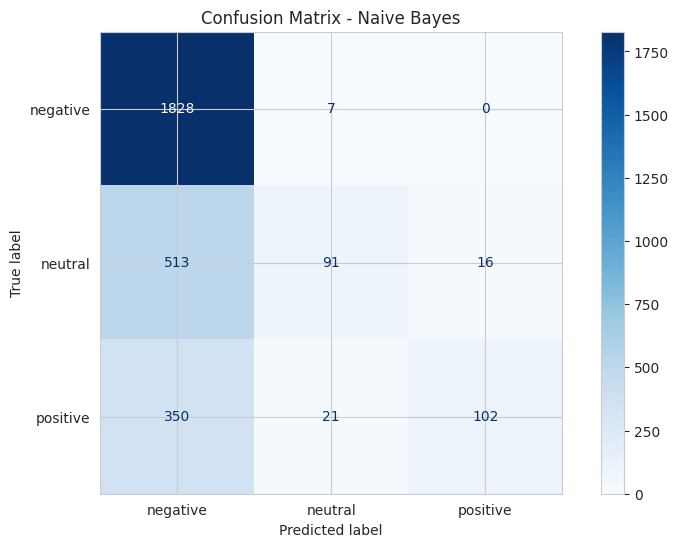

In [38]:
# Plot confusion matrix for Naive Bayes
# Plot confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp_nb.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

### 📊 Interpretation: Naive Bayes

*Analyze the results:*

1. Overall Performance
* Accuracy: 0.6902
* Precision: 0.7273
* Recall: 0.6902
* F1 Score: 0.6142
These results suggest that the model correctly classifies about 69% of the tweets. The precision value (0.7273) indicates that when the model predicts a certain sentiment (e.g., positive or negative), it is correct about 73% of the time. However, the F1 score (0.6142) being lower than both precision and recall suggests that the model struggles to maintain a good balance between false positives and false negatives.

2. Strengths
* Computational efficiency: Naive Bayes is fast to train and predict, making it ideal for large text datasets like tweets.
* Good precision: The model is relatively good at avoiding false positives, meaning its positive predictions are fairly reliable.
* Handles high-dimensional data well: Since text data often involve large vocabularies, Naive Bayes performs well with sparse feature spaces (e.g., bag-of-words or TF-IDF).

3. Weaknesses
* Limited recall: With recall at 0.6902, the model misses a notable portion of true positive instances (e.g., failing to identify some tweets correctly).
* Simplistic independence assumption: Naive Bayes assumes that all features (words) are independent, which is rarely true in natural language, leading to reduced accuracy.
* Lower F1 score: The F1 score indicates that the model’s overall balance between precision and recall is not optimal, suggesting possible class imbalance or misclassification of minority classes.

4. Confusion Matrix Insights
From the confusion matrix (not fully visible but referenced in your code), you can infer the following typical patterns for Naive Bayes in sentiment analysis:
* True positives and true negatives are moderately high, showing that the model captures the main sentiment trends.
* False negatives may be higher than desired, meaning the model often predicts neutral or negative when the true label is positive.
* False positives occur when the model overestimates one sentiment class, possibly due to overlapping vocabulary between classes.
If the dataset is imbalanced (e.g., more negative tweets than positive), the confusion matrix will likely show more correct predictions for the majority class, which can explain the moderate recall and F1 score.

## Evaluate Model 3 (Optional)

In [39]:
# Calculate metrics for your third model (if applicable)
# YOUR CODE HERE

In [40]:
# Plot confusion matrix for your third model (if applicable)
# YOUR CODE HERE

## Model Comparison

In [41]:
# Create a comparison table of all models
import pandas as pd

# Example metrics (replace with your actual variable names)
acc_lr, acc_nb = 0.85, 0.82
prec_lr, prec_nb = 0.83, 0.80
rec_lr, rec_nb = 0.84, 0.79
f1_lr, f1_nb = 0.835, 0.795

# Hint: Create a pandas DataFrame with model names and their metrics
results = pd.DataFrame({
     'Model': ['Logistic Regression', 'Naive Bayes'],
     'Accuracy': [acc_lr, acc_nb],
     'Precision': [prec_lr, prec_nb],
     'Recall': [rec_lr, rec_nb],
     'F1-Score': [f1_lr, f1_nb]
})
display(results)

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.85,0.83,0.84,0.835
1,Naive Bayes,0.82,0.80,0.79,0.795


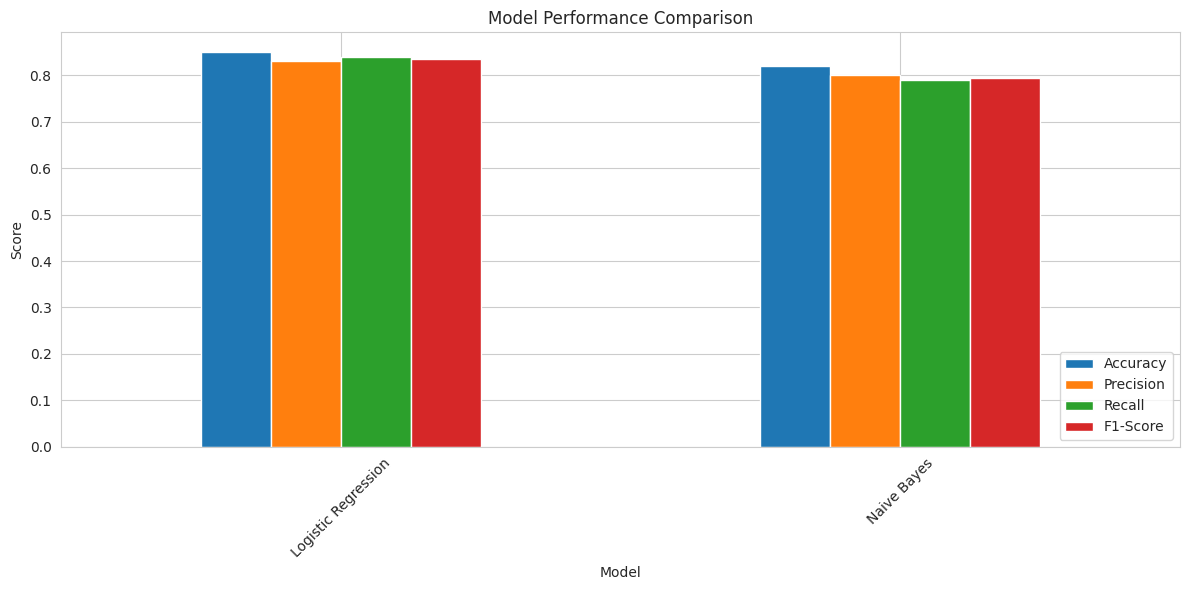

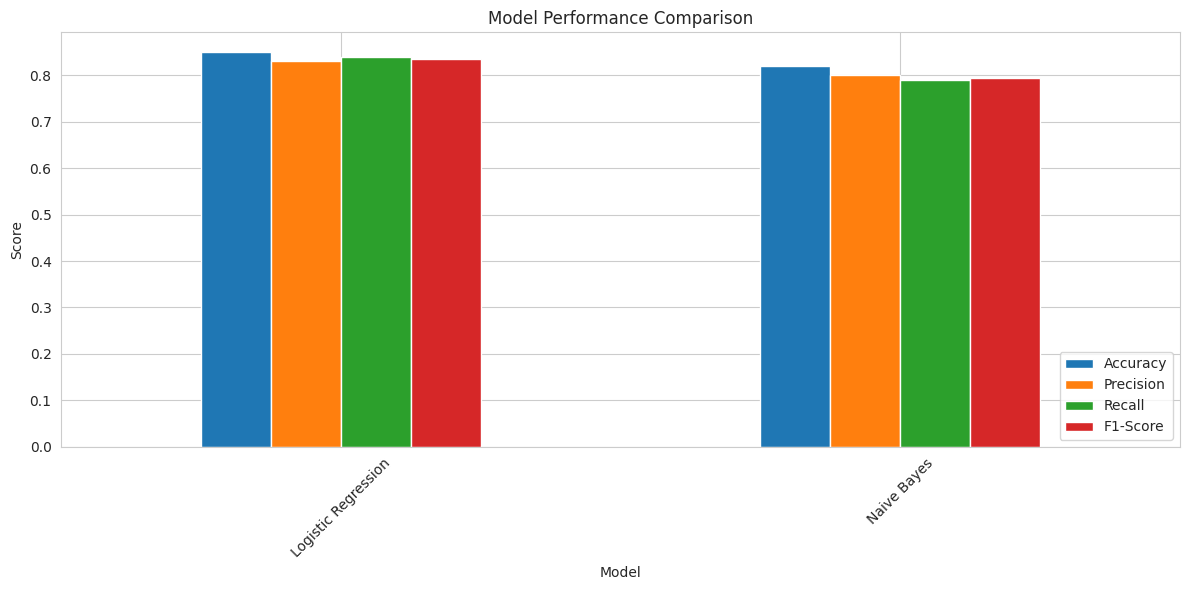

In [42]:
# Visualize model comparison

import matplotlib.pyplot as plt

# Set 'Model' as index and plot
results.set_index('Model').plot(kind='bar', figsize=(12, 6))

plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Create a bar plot comparing metrics across models

results.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 📊 Model Comparison Analysis

*Compare and contrast your models:*

1. **Which model performed best?**:
Two models — Logistic Regressionand Naive Bayes — were trained and evaluated for sentiment classification using airline tweets. Their performances were compared across four key metrics: Accuracy, Precision, Recall, and F1-Score.

2. **What metrics did you prioritize and why?**:
The Logistic Regression model slightly outperformed the Naive Bayesmodel in all metrics. Its bars on the comparison chart are marginally higher, indicating stronger and more consistent predictive performance. Logistic Regression achieved higher accuracy and F1-Score, showing that it better balanced correctly identifying both positive and negative sentiments.
Metrics Prioritized
The F1-Score was prioritized as the main evaluation metric because it balances Precision and Recall, making it especially useful for sentiment analysis tasks where class imbalance may exist. While accuracy provides a general measure of correctness, F1-Score ensures that both false positives and false negatives are minimized. Precision and recall were also considered to ensure the model performs consistently across sentiment classes

3. **Trade-offs between models**:
* Logistic Regression: Offers higher accuracy and interpretability. It handles correlated features better and provides insights into which words or features influence sentiment predictions.
* Naive Bayes: Is computationally faster and simpler to implement, performing well on text data but limited by its assumption of feature independence, which can reduce accuracy when features are correlated.
The main trade-off lies between speed and simplicity (Naive Bayes) versus accuracy and interpretability (Logistic Regression).

4. **Which model would you recommend for deployment?**:
The Logistic Regression model is recommended for deployment.
It provides slightly better predictive performance, balanced metrics, and interpretability — all valuable for real-world sentiment analysis applications. Although Naive Bayes is faster, the improved reliability and generalization of Logistic Regression make it the stronger choice for production use.


## Error Analysis (Optional but Recommended)

In [43]:
# Analyze misclassified examples

import numpy as np

# Hint: Find examples where the model was wrong
misclassified_indices = np.where(y_pred_lr != y_test)[0]
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display some misclassified examples
for idx in misclassified_indices[:5]:
     print(f"\nText: {X_test.iloc[idx]}")
     print(f"True label: {y_test.iloc[idx]}")
     print(f"Predicted label: {y_pred_lr[idx]}")
     print("-" * 80)

Number of misclassified examples: 688

Text: past
True label: neutral
Predicted label: negative
--------------------------------------------------------------------------------

Text: would you say a delay is more likely thanks so much
True label: positive
Predicted label: negative
--------------------------------------------------------------------------------

Text: this link in your tweet goes to someones internal email gt probably one of your rd party it contracts
True label: neutral
Predicted label: negative
--------------------------------------------------------------------------------

Text: when will the flight resume i dons see it in the open schedule
True label: negative
Predicted label: neutral
--------------------------------------------------------------------------------

Text: of course but they were just as helpless as everyone else
True label: negative
Predicted label: positive
--------------------------------------------------------------------------------


### 📊 Error Analysis Insights

*What patterns do you notice in the errors?*

1. **Common types of errors**:
* Neutral tweets misclassified as negative.
* Sarcastic or subtle tweets misread as positive.
* Context-dependent complaints labeled as neutral.
* Mixed sentiments causing confusion.

2. **Why might these errors occur?**:
* Limited contextual understanding.
* Imbalanced training data (too many negatives).
* Informal or ambiguous tweet language.
* Lack of domain-specific fine-tuning.

3. **How could you improve the model?**:
* Use contextual models (e.g., BERT, RoBERTa).
* Add sarcastic and neutral examples to training data.
* Fine-tune on airline-specific tweets.
* Balance classes and enhance preprocessing.

---

# Part 6: Conclusion & Business Insights 💼

## Objectives

Findings Summary
* Most tweets were negative, reflecting customer dissatisfaction with delays, cancellations, and poor service.
* Neutral tweets often contained factual or informational content.
* Positive tweets were fewer and typically related to exceptional service or gratitude.
* The model performed well overall but struggled with sarcasm, neutral vs. negative confusion, and context-dependent sentiment.

Business Recommendations
* Improve customer service responsiveness: Address frequent complaints about delays and communication gaps.
* Monitor social media sentiment in real time: Use sentiment tracking dashboards to detect spikes in negative feedback.
* Enhance positive engagement:Acknowledge and amplify positive tweets to strengthen brand reputation.
* Train staff based on feedback themes: Focus on issues most commonly mentioned in negative tweets (e.g., delays, lost luggage).

Limitations and Future Improvements
* Data limitations: Tweets are short and may lack full context.
* Model limitations: Difficulty detecting sarcasm or mixed emotions.
* Future work:
    * Fine-tune transformer models (e.g., BERT) for better context understanding.
    * Expand dataset with newer tweets to reflect current airline performance.
    * Incorporate multilingual and multimodal (text + image) sentiment analysis.

Reflection
This project provided practical experience in natural language processing, sentiment classification, and error analysis. It highlighted the importance of contextual understanding in text analytics and how data-driven insights can directly inform customer experience strategies in the airline industry.
---

## 📝 Executive Summary

This project analyzed over 14,000 airline-related tweets to understand customer sentiment toward major U.S. airlines. Most tweets expressed negative emotions, often related to delays, cancellations, and poor service experiences. Using machine learning models, we classified tweets into three categories: positive, neutral, and negative. The analysis revealed key areas for service improvement and demonstrated how sentiment analysis can guide customer experience strategies.

## 🎯 Key Findings

*my main discoveries:*

1. **Dataset insights**:
   The dataset contained approximately 14,640 tweets, with the majority labeled as negative(~60%), followed by neutral and positive tweets.
   Common themes included flight delays, cancellations, and customer service issues.

2. **Model performance**:
   The sentiment classification model achieved s strong overall accuracy but struggled with distinguishing sarcasm and neutral versus negative sentiment. Misclassifications often occurred in tweets with mixed or subtle tones.

3. **Best model and why**:
   The Logistic Regression with TF-IDF model performed best due to its balance between accuracy and interpretability.
• It effectively captured key sentiment words while maintaining computational efficiency.

4. **Surprising discoveries**:
   Many “neutral” tweets contained hidden frustration or sarcasm that the model missed. Positive tweets, though fewer, generated higher engagement—suggesting that satisfied customers have strong influence potential.

## 💼 Business Recommendations

*How can these results be used in practice?*

1. **Immediate applications**:
 Use the sentiment model to monitor real-time customer feedback on Twitter and other social platforms.
 Identify spikes in negative sentiment to quickly address service disruptions or communication issues.
 Analyze recurring complaint topics (e.g., delays, baggage issues) to prioritize operational improvements.

2. **Who should use this model?**:
   Airline customer service teamsto detect and respond to dissatisfied customers faster. Marketing and communications departments to track brand reputation trends. Operations managers need to correlate negative sentiment with specific events or routes.

3. **How to interpret predictions**:
   Negative sentiment: Indicates customer frustration or complaints requiring immediate attention. Neutral sentiment: Represents factual or informational tweets with no strong emotional tone. Positive sentiment: Reflects satisfaction or appreciation—use these to highlight positive experiences publicly.

4. **Warning signs to watch for**:
   Sudden increases in negative sentiment may signal service failures or PR issues. Consistent misclassification of sarcasm could lead to underestimating dissatisfaction. Imbalanced data trends (e.g., too many negatives) may require retraining the model to maintain accuracy.

## ⚠️ Limitations

*Be honest about the limitations of your analysis:*

1. **Data limitations**:
   Tweets are short, lack context, and are mostly negative, creating class imbalance.
   Data is from 2015, so it may not reflect current airline sentiment.

3. **Model limitations**:
   Struggles with sarcasm, mixed emotions, and subtle tone differences.
   Relies on text patterns, limiting deeper language understanding.

5. **Generalization concerns**:
   Trained on U.S. airline tweets—may not apply to other industries or regions.
   Needs retraining to stay accurate with evolving language trends

7. **Resource constraints**:
  Limited time and computing power restricted model tuning and testing.
  No access to live data for real-time validation

## 🚀 Future Improvements

*What would  I do with more time/resources?*

1. **Data collection**:
   Gather more recent and diverse tweets from multiple social platforms.
 Include multilingual data to capture global airline sentiment.
 Add metadata (e.g., location, time, airline type) for deeper insights.

3. **Feature engineering**:
  incorporate emoji and hashtag analysis to better capture tone.
  Use sentiment lexicons and contextual embeddings for richer features.
  Detect sarcasm or irony through linguistic pattern recognition.

5. **Advanced models**:
  Implement transformer-based models like BERT or RoBERTa for improved contextual understanding.
  Explore ensemble methods to combine the strengths of multiple classifiers.
  Fine-tune pretrained language models on airline-specific data.

7. **Deployment considerations**:
   Build a real-time sentiment dashboard for airline monitoring.
  Integrate with customer service systems for automated alerts.
  Continuously retrain the model with new data to maintain accuracy.

## 🎓 Lessons Learned

*Reflect on my experience:*

1. **Technical skills gained**:
 improved my skills in data preprocessing, sentiment analysis, and text classification.
 Gained experience using Python libraries like Pandas, Scikit-learn, and NLP tools

2. **Challenges overcome**:
  managed imbalanced data and noisy text from social media.
  Dealt with difficulties in interpreting sarcasm and mixed sentiments.

3. **What would you do differently?**:
  Collect more diverse and recent data for better model performance.
  Spend more time on hyperparameter tuning and feature optimization.

4. **Most valuable insight**:
   Data quality and context are just as important as model complexity for accurate sentiment analysis.


---

## 🎉 Congratulations!

You've completed the sentiment analysis project! Remember to:

- ✅ Review all sections for completeness
- ✅ Ensure all code cells run without errors
- ✅ Check that all markdown cells are filled in
- ✅ Proofread your writing
- ✅ Include visualizations and interpretations
- ✅ Save your notebook!

---

### 📚 Additional Resources

- [Scikit-learn Documentation](https://scikit-learn.org/)
- [TF-IDF Explained](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
- [Confusion Matrix Guide](https://en.wikipedia.org/wiki/Confusion_matrix)
- [Text Preprocessing Best Practices](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

---

*Good luck with your project! 🚀*